# Circular cut of the OPE

In [1]:
using Plots
using Interact

The studied expression
$$
f(s) = \frac{1}{pq}\log\frac{A(s)+2pq}{A(s)-2pq}
$$
where 
$$
p = \lambda^{1/2}(s,m_i^2,m_i^2)/(2\sqrt{s}),\quad
q = \lambda^{1/2}(s,m_f^2,m_f^2)/(2\sqrt{s})
$$
The expression for $A(s)$ comes from the denominator of OPE $m_E^2-t,\quad t = (p_1-p_3)^2$
$$
A(s) = m_E^2-m_i^2-m_f^2 + s/2
$$

In [48]:
λ(x,y,z) = x^2 + y^2 + z^2 - 2x*y - 2y*z - 2z*x
function my_log(s, mi2, mf2, mE2, ϕ)
    A = mE2-mi2-mf2 + s/2
    two_pq= sqrt(λ(s,mf2,mf2))*sqrt(λ(s,mi2,mi2))/(2s)
    B = two_pq
    (log((A-B)/(A+B)*cis(-ϕ)) + 1im*ϕ)/(2two_pq)
end

my_log (generic function with 3 methods)

Show the complex plane and sliders for the mass

Interact.Options{:SelectionSlider,Float64}(95: "input-34" = 0.7474747474747475 Float64 , "mi", 0.7474747474747475, "0.7474747474747475", 50, Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.5050505050505051"=>0.505051,"0.51010101010101"=>0.510101,"0.5151515151515151"=>0.515152,"0.5202020202020202"=>0.520202,"0.5252525252525253"=>0.525253,"0.5303030303030303"=>0.530303,"0.5353535353535354"=>0.535354,"0.5404040404040404"=>0.540404,"0.5454545454545454"=>0.545455…), Dict(0.510101=>"0.51010101010101",0.691919=>"0.6919191919191919",0.979798=>"0.9797979797979798",0.59596=>"0.5959595959595959",0.843434=>"0.8434343434343434",0.565657=>"0.5656565656565656",0.924242=>"0.9242424242424242",0.989899=>"0.98989898989899",0.782828=>"0.7828282828282829",0.606061=>"0.6060606060606061"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(97: "input-35" = 0.7929292929292929 Float64 , "mE", 0.7929292929292929, "0.7929292929292929", 50, Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.11414141414141414"=>0.114141,"0.12828282828282828"=>0.128283,"0.14242424242424243"=>0.142424,"0.15656565656565657"=>0.156566,"0.1707070707070707"=>0.170707,"0.18484848484848485"=>0.184848,"0.198989898989899"=>0.19899,"0.21313131313131314"=>0.213131,"0.22727272727272727"=>0.227273…), Dict(0.510101=>"0.51010101010101",0.891919=>"0.8919191919191919",1.16061=>"1.1606060606060606",0.312121=>"0.31212121212121213",1.13232=>"1.1323232323232324",1.5=>"1.5",0.368687=>"0.3686868686868687",0.906061=>"0.906060606060606",1.44343=>"1.4434343434343435",1.27374=>"1.2737373737373738"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(99: "input-36" = 0.0 Float64 , "ϕ", 0.0, "0.0", 50, Interact.OptionDict(DataStructures.OrderedDict("-0.3141592653589793"=>-0.314159,"-0.3077478517802246"=>-0.307748,"-0.30133643820146994"=>-0.301336,"-0.29492502462271525"=>-0.294925,"-0.2885136110439606"=>-0.288514,"-0.28210219746520593"=>-0.282102,"-0.27569078388645124"=>-0.275691,"-0.26927937030769655"=>-0.269279,"-0.26286795672894187"=>-0.262868,"-0.2564565431501872"=>-0.256457…), Dict(-0.0448799=>"-0.04487989505128276",0.0384685=>"0.03846848147252808",0.0448799=>"0.04487989505128276",0.141051=>"0.14105109873260296",-0.00641141=>"-0.00641141357875468",-0.173108=>"-0.17310816662637635",0.0961712=>"0.09617120368132019",-0.166697=>"-0.1666967530476217",-0.294925=>"-0.29492502462271525",-0.262868=>"-0.26286795672894187"…)), Any[], Any[], true, "horizontal", true)

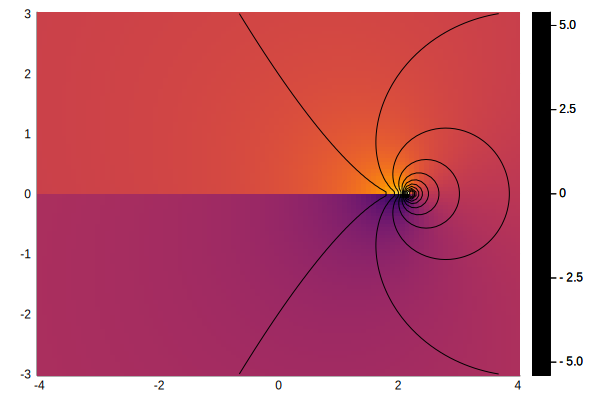

In [50]:
@manipulate for mi = linspace(.5,1,100), mE = linspace(.1,1.5,100),  ϕ=linspace(-π/10,π/10,99)
    let sx = linspace(-4,4,100), sy = linspace(-3,3,100)
        cal = [my_log(x+1im*y,mi^2,1,mE^2,ϕ) for y in sy, x in sx]
        heatmap(sx,sy,imag.(cal))
        contour!(sx,sy,real.(cal), l=(:black, 1), c=ColorGradient([:black,:black]), levels=23)
    end
end